# Población España

In [102]:
import pandas as pd
import re
import plotly.graph_objs as go
from plotly.offline import iplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import subplots
import plotly.express as px
import missingno as msno

### Datos extraido de Instituto Nacional de Estadistica(I.N.E.[www.ine.es](https://www.ine.es/index.htm))

#### Importar archivo de dados España

In [103]:
Poblacion_españa = pd.read_csv(r"C:\Users\adria\Desktop\Mi primer proyecto\EDA\EDA_Adrian_Poblacion\data\Poblacion_España.csv",sep='\t')
Poblacion_españa

,Poblacion España,2022
0,Población total,47615034
1,Hombres,23310627
2,Mujeres,24304407
3,Extranjeros,5579947


In [104]:
fig = px.bar(Poblacion_españa,x = '2022',
             y = 'Poblacion España',
             text_auto = '.5s',
             title='Población España 2022')
fig.update_traces(marker_color = 'green',
                  marker_line_color = 'red',
                  marker_line_width = 3)
fig.show()

#### Importar datos población por provincias y presentar información basica.

In [105]:
Poblacion_provincias = pd.read_csv('data/Poblacion_por_capitales_de_provincias.csv',sep='\t',encoding='latin1')

In [106]:
Poblacion_provincias.head()

,Pob_Cap,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,02003 Albacete,172722,174336,173329,173050,172816,172426,172121,172487,172693,...,170475,169716,166909,164771,161508,159518,156466,155142,152155,149507
1,03014 Alicante/Alacant,337304,337482,334887,331577,329988,330525,328648,332067,335052,...,334418,334757,331750,322673,322431,319380,310330,305911,293629,283243
2,04013 Almería,200753,201322,198533,196851,195389,194515,194203,193351,192697,...,190013,188810,187521,186651,185309,181702,177681,176727,173338,170994
3,05019 Ávila,57949,58369,57744,57657,58149,58083,58358,58933,59258,...,58245,56855,56144,53794,53272,52612,52417,52078,50241,47967
4,06015 Badajoz,150610,150984,150702,150530,150543,149946,149892,150517,150621,...,150376,148334,146832,145257,143748,143019,139135,138415,136851,136319


In [107]:
Poblacion_provincias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pob_Cap  50 non-null     object
 1   2021     50 non-null     int64 
 2   2020     50 non-null     int64 
 3   2019     50 non-null     int64 
 4   2018     50 non-null     int64 
 5   2017     50 non-null     int64 
 6   2016     50 non-null     int64 
 7   2015     50 non-null     int64 
 8   2014     50 non-null     int64 
 9   2013     50 non-null     int64 
 10  2012     50 non-null     int64 
 11  2011     50 non-null     int64 
 12  2010     50 non-null     int64 
 13  2009     50 non-null     int64 
 14  2008     50 non-null     int64 
 15  2007     50 non-null     int64 
 16  2006     50 non-null     int64 
 17  2005     50 non-null     int64 
 18  2004     50 non-null     int64 
 19  2003     50 non-null     int64 
 20  2002     50 non-null     int64 
 21  2001     50 non-null     int64 
dtypes: i

In [108]:
Poblacion_provincias.isnull().sum()

Pob_Cap    0
2021       0
2020       0
2019       0
2018       0
2017       0
2016       0
2015       0
2014       0
2013       0
2012       0
2011       0
2010       0
2009       0
2008       0
2007       0
2006       0
2005       0
2004       0
2003       0
2002       0
2001       0
dtype: int64

In [109]:
Poblacion_provincias.columns

Index(['Pob_Cap', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006',
       '2005', '2004', '2003', '2002', '2001'],
      dtype='object')

#### Limpieza de datos

In [110]:
# Buscando digitos con regex y eliminar con .replace() de la columna 'Pob_cap'
Poblacion_provincias['Pob_Cap'] = Poblacion_provincias['Pob_Cap'].replace(re.compile(r'[0-9]'),'')
Poblacion_provincias = Poblacion_provincias.set_index(['Pob_Cap'])

#### Matriz de corelación

<AxesSubplot: >

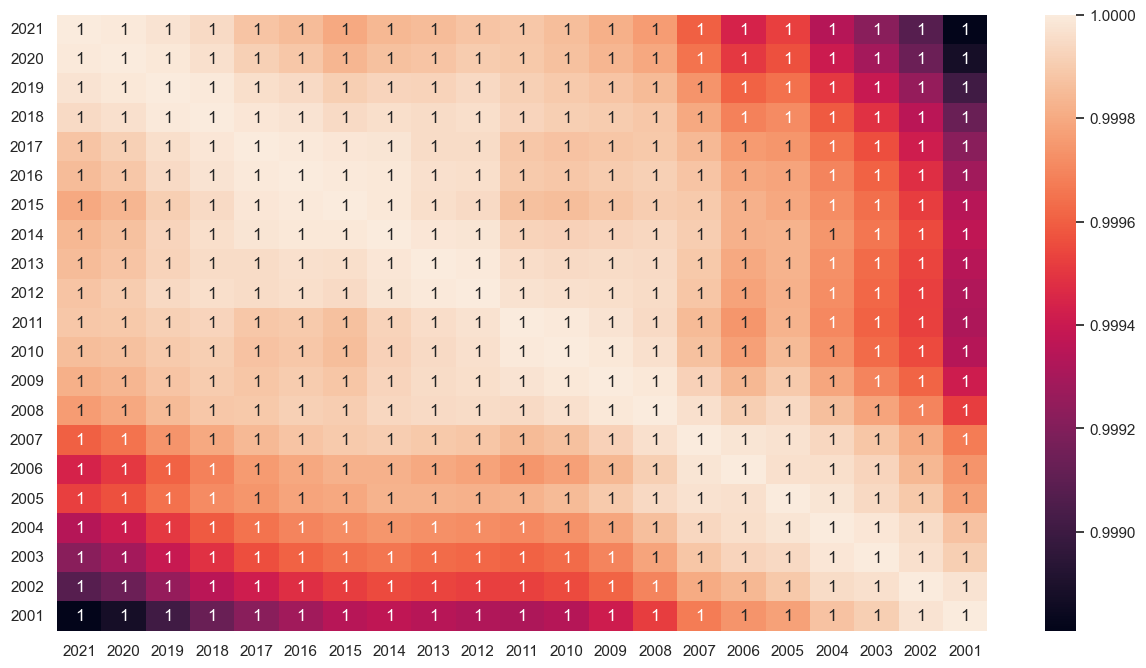

In [111]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(Poblacion_provincias.corr(),annot=True)

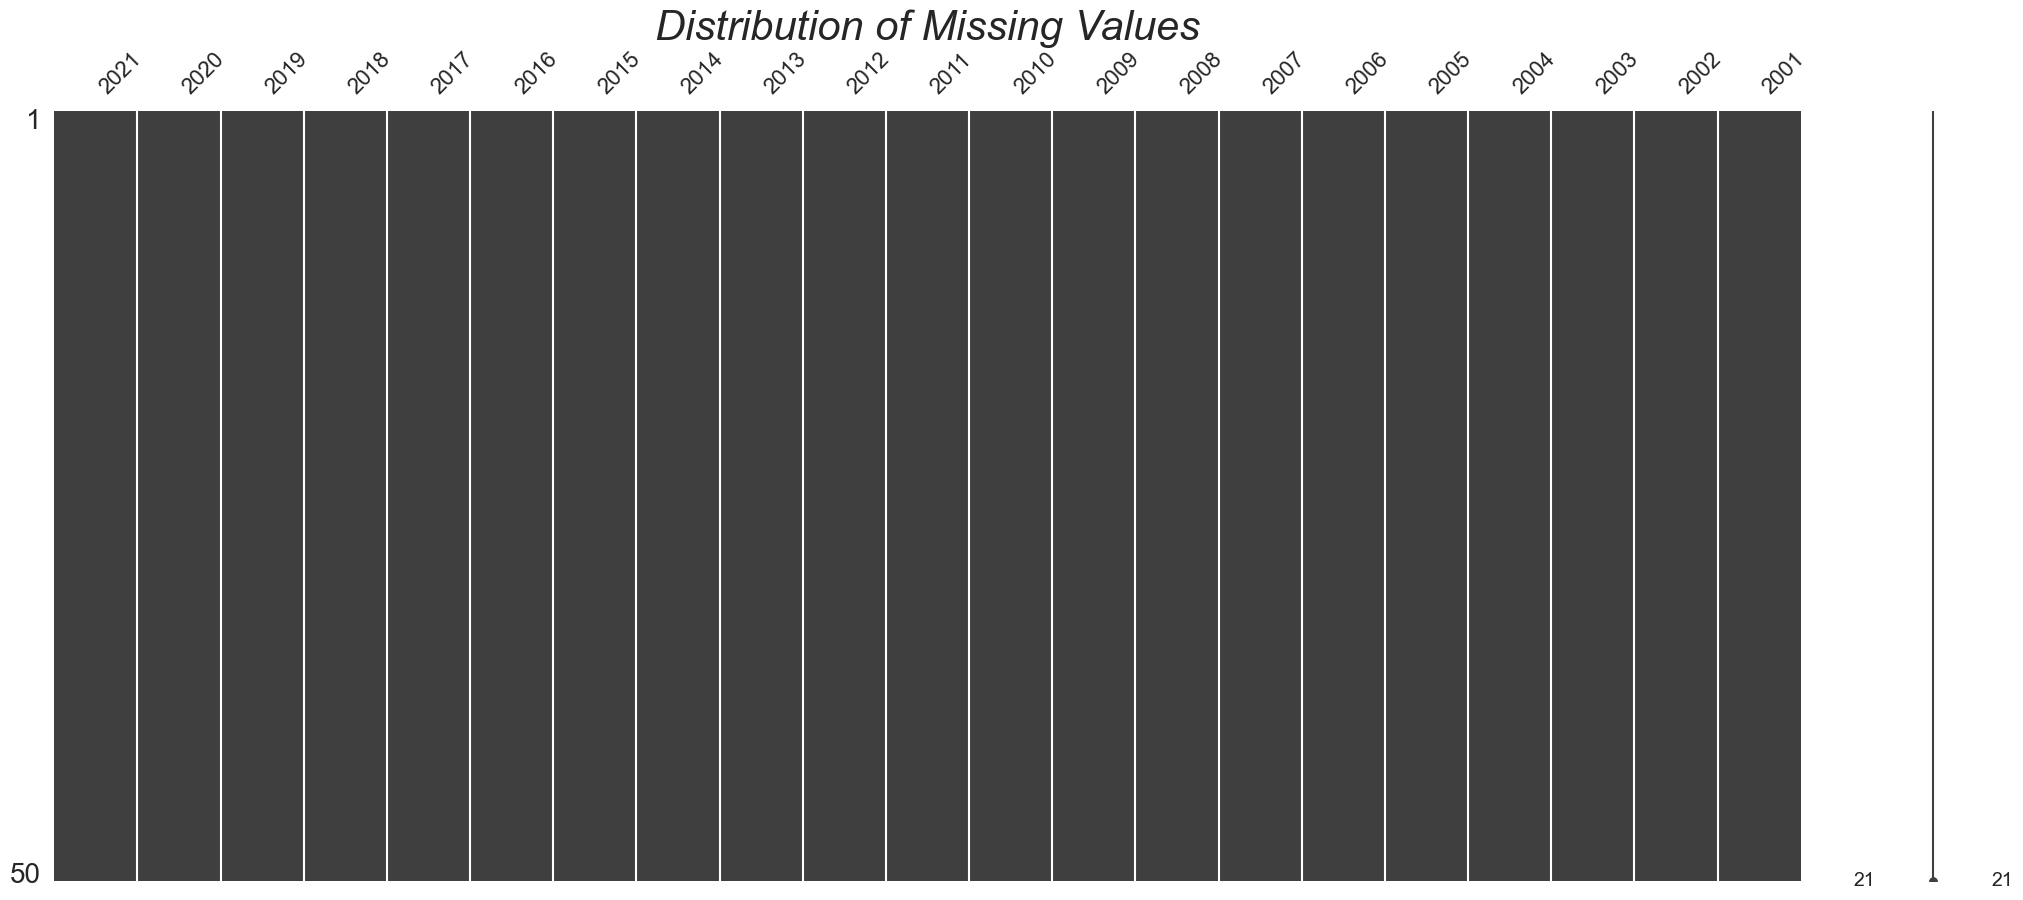

In [112]:
msno.matrix(Poblacion_provincias)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

#### Extraer del dataset información de algunas de las grandes ciudades de España de los ultimos 20 años y pintarla

In [113]:
Sevilla = Poblacion_provincias.iloc[40].sort_index(ascending=True)
Madrid = Poblacion_provincias.iloc[26].sort_index(ascending=True)
Malaga = Poblacion_provincias.iloc[27].sort_index(ascending=True)
Barcelona = Poblacion_provincias.iloc[5].sort_values(ascending=True)

In [142]:
fig1 = px.line(Madrid,
               x=Madrid.index,
               y=Madrid.values,
               title='Población Madrid 2001-2021',
               markers=True
               )
fig1.update_xaxes(title='Año')
fig1.update_yaxes(title='Población')
fig1.update_traces(line=dict(color="Black", width=3))
fig1.show()

In [143]:
fig2 = px.line(Malaga,
               x=Malaga.index,
               y=Malaga.values,
               title='Población Malaga 2001-2021',
               markers=True
               )
fig2.update_xaxes(title='Año')
fig2.update_yaxes(title='Población')
fig2.update_traces(line=dict(color="Black", width=3))
fig2.show()

In [144]:
fig3 = px.line(Barcelona,
               x=Barcelona.index,
               y=Barcelona.values,
               title='Población Barcelona 2001-2021',
               markers=True
               )
fig3.update_xaxes(title='Año')
fig3.update_yaxes(title='Población')
fig3.update_traces(line=dict(color="Black", width=3))
fig3.show()

In [145]:
fig4 = px.line(Sevilla,
               x=Sevilla.index,
               y=Sevilla.values,
               title='Población Sevilla 2001-2021',
               markers=True
               )
fig4.update_xaxes(title='Año')
fig4.update_yaxes(title='Población')
fig4.update_traces(line=dict(color="Black", width=3))
fig4.show()

#### Seguimos analizando datos sobre Sevilla y su caida de poblacion

#### Saldo migratorio Sevilla 2001 2021

In [118]:
saldo_migr_sev = pd.read_csv(r"C:\Users\adria\Downloads\saldo migratorio sevilla capital.csv",sep='\t')

In [119]:
fig5 = px.bar(saldo_migr_sev,
              y=['Saldo migratorio','Inmigraciones','Emigraciones'],
              x='Año',text_auto='.3s',
              color_discrete_map={'Saldo migratorio':'red','Inmigraciones':'green','Emigraciones':'blue'},
              title='Saldo migratorio 2001-2021'
              )
fig5.update_yaxes(title = 'Población')
fig5.show()

#### Principales pueblos con la emigracion de Sevilla

In [124]:
inmig_pueb_sev = pd.read_csv('data/Inmigraciones_pueblos_desde_sevilla_capital_2001_2021.csv',sep=';')
inmig_pueb_sev.drop(['Lugar de origen','Medida','Unnamed: 5'],axis=1,inplace=True)

In [126]:
fig6 = px.line(inmig_pueb_sev,x='Lugar de destino',
               y='Valor',
               color='Anual',
               markers=True,
               title='Inmigraciones pueblos desde Sevilla capital 2002-2006-2021')
fig6.update_yaxes(title='Población')
fig6.show()

#### Comparar precio m2 de Sevilla con principales pueblos cercanos

#### Sevilla m2

In [120]:
precio_sevilla = pd.read_csv('data/Precio_viv_sevilla.csv',sep='\t')
precio_sevilla['Precio m2'] = precio_sevilla['Precio m2'].replace(re.compile(r'(.€.m2)'),'')
precio_sevilla['Año'] = precio_sevilla['Año'].replace(re.compile(r'[a-zA-Z]'),'')
precio_sevilla_med = precio_sevilla.groupby('Año')['Precio m2'].median()

In [152]:
fig7 = px.bar(precio_sevilla_med,
              x=precio_sevilla_med.index,
              y=precio_sevilla_med.values,
              title='Precio en euros por m2 en Sevilla 2008-2022',
              text_auto='.4s')
fig7.update_xaxes(title='Año')
fig7.update_yaxes(title='Euro/m2')
fig7.update_traces(marker_color = 'red', marker_line_color = 'black',
                  marker_line_width = 3)
fig7.show()

#### Dos Hermanas m2

In [153]:
precio_dos_herm = pd.read_csv('data/Precio_viv_Dos_Hermanas.csv',sep='\t')
precio_dos_herm['Precio m2'] = precio_dos_herm['Precio m2'].replace(re.compile(r'(.€.m2)'),'')
precio_dos_herm['Año'] = precio_dos_herm['Año'].replace(re.compile(r'[a-zA-Z]'),'')
precio_dos_herm_med = precio_dos_herm.groupby('Año')['Precio m2'].median()

In [154]:
fig8 = px.bar(precio_dos_herm_med,
              x=precio_dos_herm_med.index,
              y=precio_dos_herm_med.values,
              title='Precio en euros por m2 en Dos Hrmanas 2008-2022',
              text_auto='.4s')
fig8.update_xaxes(title='Año')
fig8.update_yaxes(title='Euro/m2')
fig8.update_traces(marker_color = 'red', marker_line_color = 'black',
                  marker_line_width = 3)
fig8.show()

#### Alcalá de Guadaira

In [155]:
precio_alcala = pd.read_csv('data/Precio_viv_Alcala_Gra.csv',sep='\t')
precio_alcala['Precio m2'] = precio_alcala['Precio m2'].replace(re.compile(r'(.€.m2)'),'')
precio_alcala['Año'] = precio_alcala['Año'].replace(re.compile(r'[a-zA-Z]'),'')
precio_alcala_med = precio_alcala.groupby('Año')['Precio m2'].median()

In [157]:
fig9 = px.bar(precio_alcala_med,
              x=precio_alcala_med.index,
              y=precio_alcala_med.values,
              title='Precio en euros por m2 en Alcalá de Gra. 2008-2022',
              text_auto='.4s')
fig9.update_xaxes(title='Año')
fig9.update_yaxes(title='Euro/m2')
fig9.update_traces(marker_color = 'red', marker_line_color = 'black',
                  marker_line_width = 3)
fig9.show()

#### Ahora con precio/m2 de los alquileres

#### Sevilla

In [182]:
alquiler_sevilla = pd.read_csv(r"C:\Users\adria\Desktop\Mi primer proyecto\EDA\EDA_Adrian_Poblacion\data\Alquiler sevilla.csv",sep='\t')

In [184]:
alquiler_sevilla['Precio m2'] = alquiler_sevilla['Precio m2'].replace(re.compile(r'(.€.m2)'),'')
alquiler_sevilla['Año'] = alquiler_sevilla['Año'].replace(re.compile(r'[a-zA-Z]'),'')
alquiler_sevilla = alquiler_sevilla.groupby('Año')['Precio m2'].median()

In [195]:
fig10 = px.bar(alquiler_sevilla,
              x=alquiler_sevilla.index,
              y=alquiler_sevilla.values,
              title='Precio alquiler euros/m2 en Sevilla 2009-2022',
              text_auto='.2s')
fig10.update_xaxes(title='Año')
fig10.update_yaxes(title='Euro/m2')
fig10.update_traces(marker_color = 'blue', marker_line_color = 'black',
                  marker_line_width = 3)
fig10.show()

#### Dos Hermanas

In [187]:
alquiler_D_hermanas = pd.read_csv(r"C:\Users\adria\Desktop\Mi primer proyecto\EDA\EDA_Adrian_Poblacion\data\Alquiler Dos Hermanas.csv",sep='\t')

In [188]:
alquiler_D_hermanas['Precio m2'] = alquiler_D_hermanas['Precio m2'].replace(re.compile(r'(.€.m2)'),'')
alquiler_D_hermanas['Año'] = alquiler_D_hermanas['Año'].replace(re.compile(r'[a-zA-Z]'),'')
alquiler_D_hermanas = alquiler_D_hermanas.groupby('Año')['Precio m2'].median()

In [192]:
fig11 = px.bar(alquiler_D_hermanas,
              x=alquiler_D_hermanas.index,
              y=alquiler_D_hermanas.values,
              title='Precio alquiler euros/m2 en Dos Hermanas 2009-2022',
              text_auto='.2s')
fig11.update_xaxes(title='Año')
fig11.update_yaxes(title='Euro/m2')
fig11.update_traces(marker_color = 'blue', marker_line_color = 'black',
                  marker_line_width = 3)
fig11.show()

#### Alcalá deGuadaira

In [190]:
alquiler_alcala = pd.read_csv(r"C:\Users\adria\Desktop\Mi primer proyecto\EDA\EDA_Adrian_Poblacion\data\Alquiler Alcala.csv",sep='\t')

In [191]:
alquiler_alcala['Precio m2'] = alquiler_alcala['Precio m2'].replace(re.compile(r'(.€.m2)'),'')
alquiler_alcala['Año'] = alquiler_alcala['Año'].replace(re.compile(r'[a-zA-Z]'),'')
alquiler_alcala = alquiler_alcala.groupby('Año')['Precio m2'].median()

In [194]:
fig11 = px.bar(alquiler_alcala,
              x=alquiler_alcala.index,
              y=alquiler_alcala.values,
              title='Precio alquiler euros/m2 en Alcalá de Gra. 2011-2022',
              text_auto='.2s')
fig11.update_xaxes(title='Año')
fig11.update_yaxes(title='Euro/m2')
fig11.update_traces(marker_color = 'blue', marker_line_color = 'black',
                  marker_line_width = 3)
fig11.show()

# ***Conclusión***

#### ***El gran descenso de población a Sevilla capital se debe principalmente al elevado coste para adquirir una vivienda ya sea de segunda mano o nueva y tambien el precio del alquiler.***
#### ***Se puede sacar aún más datos pero creo que con esto queda demostrado mi teoria***

## __EXTRA__

### ***Algunos datos interesantes sobre la población de España***

#### Los 10 pueblos de España con menos habitantes

In [196]:
pob_mun = pd.read_csv('data/poblacion_municipios.csv')
min_diez = pob_mun.iloc[[6859,4213,6341,2915,2238,6299,3096,2875,3120,6349]]
fig12 = px.bar(min_diez,x='Municipios',y='Total',title='Los 10 pueblos con menos habitantes de España',text_auto=True)
fig12.update_traces(marker_color = 'green', marker_line_color = 'red',
                  marker_line_width = 3)
fig12.show()

In [210]:
nomb_frec_H = pd.read_csv(r"C:\Users\adria\Desktop\Mi primer proyecto\EDA\EDA_Adrian_Poblacion\data\Nombre mas frecuente H.csv",sep='\t')
fig_H = px.bar(nomb_frec_H,x='Frecuencia',y='Nombre',title='Los 20 nombres más usados en España H')
fig_H.show()

In [206]:
nomb_frec_H

,Nombre,Frecuencia,Edad Media
0,ANTONIO,640854,57.1
1,MANUEL,562798,55.7
2,JOSE,547142,62.1
3,FRANCISCO,467933,58.7
4,DAVID,369633,32.9
5,JUAN,325791,56.3
6,JAVIER,308465,35.3
7,JOSE ANTONIO,303446,51.9
8,DANIEL,302864,28.8
9,FRANCISCO JAVIER,285853,47.4


In [214]:
nomb_frec_M = pd.read_csv(r"C:\Users\adria\Desktop\Mi primer proyecto\EDA\EDA_Adrian_Poblacion\data\Nombre mas frecuente M.csv",sep='\t')
fig_M = px.bar(nomb_frec_M,x='Frecuencia',y='Nombre',title='Los 20 nombres más usados en España M')
fig_M.show()

ParserError: Error tokenizing data. C error: Expected 3 fields in line 6, saw 4


In [213]:
nomb_frec_M

,Nombre,Frecuencia,Edad Media
0,MARIA CARMEN,181160,59.5
1,MARIA,181161,48.4
2,CARMEN,181162,60.5
3,ANA MARIA,181163,53.6
4,MARIA PILAR,181164,59.4
5,LAURA,181165,30.8
6,JOSEFA,181166,69.6
7,ISABEL,181167,58.7
8,MARIA DOLORES,181168,58.9
9,MARIA TERESA,181169,59.4
